# Etude des offres d'emplois

In [4]:
import re
import pandas as pd 
import string
from collections import defaultdict
from datetime import datetime
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer # ou CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ouverture du fichier de données

In [5]:
df = pd.read_excel('20231026-Donnees_Info_Poste.xlsx') 
df

,titre,entreprise,lieu,categorie,contrat,salaire,parution,description,note,review
0,Data Entry Clerk,Charles Hull Contracting Co P/L,"Waroona, Mandurah & Peel WA",Data Entry & Word Processing (Administration &...,Full time,"$60,000 – $70,000 per year",Posted 1d ago,Charles Hull Contracting is a long-established...,NaN,NaN
1,Data Entry Administrator,Fienza,"Brendale, Brisbane QLD",Data Entry & Word Processing (Administration &...,Full time,NaN,Posted 2d ago,"About usFienza develops, manufactures, and dis...",NaN,NaN
2,Junior Data Analyst,Add Staff Recruitment Pty Ltd,"Fortitude Valley, Brisbane QLD",Business/Systems Analysts (Information & Commu...,Full time,"$55,000 – $60,000 per year",Posted 3d ago,Solar Service Guys (SSG) is a National Special...,NaN,NaN
3,Data Science Cadet,Jemena,Melbourne VIC,"Mathematics, Statistics & Information Sciences...",Contract/Temp,NaN,Posted 17h ago,About UsJemena is an Australian energy company...,3.0,/companies/jemena-432985/reviews?jobId=71046255
4,"Head of Data Strategy, Analytics & Insights",AustralianSuper,Melbourne VIC,Other (Consulting & Strategy),Full time,NaN,Posted 2d ago,AustralianSuper is on an exciting transformati...,4.0,/companies/australiansuper-813334/reviews?jobI...
...,...,...,...,...,...,...,...,...,...,...
149,Data Analyst,Windsor Group,"Milton, Brisbane QLD",Business/Systems Analysts (Information & Commu...,Contract/Temp,NaN,Posted 7d ago,Assist your community in during times of crisi...,NaN,NaN
150,Data Analyst,Clarrow Pty Ltd,Melbourne VIC,Business/Systems Analysts (Information & Commu...,Full time,NaN,Posted 6d ago,As a Data Analyst you will play a critical rol...,NaN,NaN
151,Data Analyst/Engineer,DSi Professionals Pty Ltd,Canberra ACT,Business/Systems Analysts (Information & Commu...,Contract/Temp,NaN,Posted 10h ago,We are a Professional Services Consulting busi...,NaN,NaN
152,Billing and Meter data Analyst - Retail Energy,Next Business Energy Pty Ltd,"Southbank, Melbourne VIC","Analysis & Reporting (Mining, Resources & Energy)",Full time,NaN,Posted 3d ago,About The BusinessNext Business Energy is a gr...,NaN,NaN


Colonne Parution traitement - extraction du temps

In [6]:
def extraction_temps(parution):
    pattern = r'(\d+[dh])'  # Correspond à un nombre suivi de "d" ou "h"
    temps = re.findall(pattern, parution)[0]
    return temps

df['parution_modif'] = df['parution'].apply(extraction_temps)
df

,titre,entreprise,lieu,categorie,contrat,salaire,parution,description,note,review,parution_modif
0,Data Entry Clerk,Charles Hull Contracting Co P/L,"Waroona, Mandurah & Peel WA",Data Entry & Word Processing (Administration &...,Full time,"$60,000 – $70,000 per year",Posted 1d ago,Charles Hull Contracting is a long-established...,NaN,NaN,1d
1,Data Entry Administrator,Fienza,"Brendale, Brisbane QLD",Data Entry & Word Processing (Administration &...,Full time,NaN,Posted 2d ago,"About usFienza develops, manufactures, and dis...",NaN,NaN,2d
2,Junior Data Analyst,Add Staff Recruitment Pty Ltd,"Fortitude Valley, Brisbane QLD",Business/Systems Analysts (Information & Commu...,Full time,"$55,000 – $60,000 per year",Posted 3d ago,Solar Service Guys (SSG) is a National Special...,NaN,NaN,3d
3,Data Science Cadet,Jemena,Melbourne VIC,"Mathematics, Statistics & Information Sciences...",Contract/Temp,NaN,Posted 17h ago,About UsJemena is an Australian energy company...,3.0,/companies/jemena-432985/reviews?jobId=71046255,17h
4,"Head of Data Strategy, Analytics & Insights",AustralianSuper,Melbourne VIC,Other (Consulting & Strategy),Full time,NaN,Posted 2d ago,AustralianSuper is on an exciting transformati...,4.0,/companies/australiansuper-813334/reviews?jobI...,2d
...,...,...,...,...,...,...,...,...,...,...,...
149,Data Analyst,Windsor Group,"Milton, Brisbane QLD",Business/Systems Analysts (Information & Commu...,Contract/Temp,NaN,Posted 7d ago,Assist your community in during times of crisi...,NaN,NaN,7d
150,Data Analyst,Clarrow Pty Ltd,Melbourne VIC,Business/Systems Analysts (Information & Commu...,Full time,NaN,Posted 6d ago,As a Data Analyst you will play a critical rol...,NaN,NaN,6d
151,Data Analyst/Engineer,DSi Professionals Pty Ltd,Canberra ACT,Business/Systems Analysts (Information & Commu...,Contract/Temp,NaN,Posted 10h ago,We are a Professional Services Consulting busi...,NaN,NaN,10h
152,Billing and Meter data Analyst - Retail Energy,Next Business Energy Pty Ltd,"Southbank, Melbourne VIC","Analysis & Reporting (Mining, Resources & Energy)",Full time,NaN,Posted 3d ago,About The BusinessNext Business Energy is a gr...,NaN,NaN,3d


Colonne description -- lemmatisation + stemmatisation

In [7]:
def stem_text(text):
    # ponctuation
    punct = string.punctuation
    # Mots vides
    st = set(stopwords.words('english'))
    # Racinisation
    stemmer = PorterStemmer()

    # Utilisation d'une expression régulière pour supprimer les émojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Transformation de la phrase, sans prendre en compte les stopwords, en mot.
    words = [tok.lower() for tok in word_tokenize(text) if tok not in set(st) and tok not in string.punctuation]
    # Racinnation des mots 
    racine = [stemmer.stem(mot) for mot in words]
    return ' '.join(racine)


def lemmatise_text(text):
    # ponctuation
    punct = string.punctuation
    # Mots vides
    st = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Utilisation d'une expression régulière pour supprimer les émojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Transformation de la phrase, sans prendre en compte les stopwords, en mot.
    words = [tok.lower() for tok in word_tokenize(text) if tok not in set(st) and tok not in string.punctuation]
    # Racinnation des mots 
    lem = [lemmatizer.lemmatize(mot) for mot in words]

    return ' '.join(lem)


df['description_stem'] = df['description'].apply(stem_text)
df['description_lem'] = df['description'].apply(lemmatise_text)
df

,titre,entreprise,lieu,categorie,contrat,salaire,parution,description,note,review,parution_modif,description_stem,description_lem
0,Data Entry Clerk,Charles Hull Contracting Co P/L,"Waroona, Mandurah & Peel WA",Data Entry & Word Processing (Administration &...,Full time,"$60,000 – $70,000 per year",Posted 1d ago,Charles Hull Contracting is a long-established...,NaN,NaN,1d,charl hull contract long-establish respect fam...,charles hull contracting long-established resp...
1,Data Entry Administrator,Fienza,"Brendale, Brisbane QLD",Data Entry & Word Processing (Administration &...,Full time,NaN,Posted 2d ago,"About usFienza develops, manufactures, and dis...",NaN,NaN,2d,about usfienza develop manufactur distribut be...,about usfienza develops manufacture distribute...
2,Junior Data Analyst,Add Staff Recruitment Pty Ltd,"Fortitude Valley, Brisbane QLD",Business/Systems Analysts (Information & Commu...,Full time,"$55,000 – $60,000 per year",Posted 3d ago,Solar Service Guys (SSG) is a National Special...,NaN,NaN,3d,solar servic guy ssg nation specialist solar s...,solar service guy ssg national specialist sola...
3,Data Science Cadet,Jemena,Melbourne VIC,"Mathematics, Statistics & Information Sciences...",Contract/Temp,NaN,Posted 17h ago,About UsJemena is an Australian energy company...,3.0,/companies/jemena-432985/reviews?jobId=71046255,17h,about usjemena australian energi compani own o...,about usjemena australian energy company owns ...
4,"Head of Data Strategy, Analytics & Insights",AustralianSuper,Melbourne VIC,Other (Consulting & Strategy),Full time,NaN,Posted 2d ago,AustralianSuper is on an exciting transformati...,4.0,/companies/australiansuper-813334/reviews?jobI...,2d,australiansup excit transform journey establis...,australiansuper exciting transformation journe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Data Analyst,Windsor Group,"Milton, Brisbane QLD",Business/Systems Analysts (Information & Commu...,Contract/Temp,NaN,Posted 7d ago,Assist your community in during times of crisi...,NaN,NaN,7d,assist commun time crisi excit temporary/casu ...,assist community time crisis exciting temporar...
150,Data Analyst,Clarrow Pty Ltd,Melbourne VIC,Business/Systems Analysts (Information & Commu...,Full time,NaN,Posted 6d ago,As a Data Analyst you will play a critical rol...,NaN,NaN,6d,as data analyst play critic role extract analy...,a data analyst play critical role extracting a...
151,Data Analyst/Engineer,DSi Professionals Pty Ltd,Canberra ACT,Business/Systems Analysts (Information & Commu...,Contract/Temp,NaN,Posted 10h ago,We are a Professional Services Consulting busi...,NaN,NaN,10h,we profession servic consult busi specialis di...,we professional service consulting business sp...
152,Billing and Meter data Analyst - Retail Energy,Next Business Energy Pty Ltd,"Southbank, Melbourne VIC","Analysis & Reporting (Mining, Resources & Energy)",Full time,NaN,Posted 3d ago,About The BusinessNext Business Energy is a gr...,NaN,NaN,3d,about the businessnext busi energi green tech ...,about the businessnext business energy green t...


Colonne métier

In [35]:
def string_to_categorical_job(df,col):
    new_col=[]
    for metier in df[col]:
        if re.search("data", metier) is not None and (re.search("scientist", metier) is not None 
                                                        or re.search("science", metier) is not None) :
            new_metier="data scientist"
        elif re.search("data", metier) is not None and re.search("engineer", metier) is not None:
            new_metier="data engineer"
        elif re.search("data", metier) is not None and (re.search("architect", metier) is not None 
                                                        or re.search("configuration", metier) is not None 
                                                        or re.search("administration", metier) is not None):
            new_metier="data architect"
        elif re.search("data", metier) is not None and re.search("entry", metier) is not None:
            new_metier="data entry"
        elif re.search("business", metier) :
            new_metier="business analyst"
        elif (re.search("manager", metier) is not None 
            or re.search("managers", metier) is not None 
            or re.search("head", metier) is not None 
            or re.search("managment", metier) is not None 
            or re.search("management", metier) is not None 
            or re.search("leader", metier) is not None
            or re.search("lead", metier) is not None 
            or re.search("chief", metier) is not None
            or re.search("master", metier) is not None):
            new_metier="data manager"
        elif (re.search("data", metier) is not None and (re.search("analyst", metier) is not None  
                                                        or re.search("analytics", metier) is not None
                                                        or re.search("analysis", metier) is not None 
                                                        or re.search("specialist", metier) is not None 
                                                        or re.search("assistant", metier) is not None
                                                        or re.search("report", metier) is not None)) or re.search("analyst", metier) is not None :
            new_metier="data analyst"
        else:
            new_metier="other data job"
        new_col.append(new_metier)
    new_name=col+"_modified"
    df[new_name]=new_col
    return df

df['titre_lem'] = df['titre'].apply(lemmatise_text)
df=string_to_categorical_job(df,"titre_lem")
df["titre_lem_modified"].value_counts()

data analyst        67
data manager        25
data engineer       21
data entry          18
data scientist      10
data architect       5
business analyst     5
other data job       3
Name: titre_lem_modified, dtype: int64

Compter le nombre de mots 

In [ ]:
def compte_untexte(text):
    l_mot = text.split()
    counts = {}

    for mot in l_mot:
        counts[mot] = counts.get(mot,0)+1
    
    return counts

df['description_compte'] = df['description_lem'].apply(compte_untexte)
df

,titre,entreprise,lieu,categorie,contrat,salaire,parution,description,note,review,parution_modif,description_stem,description_lem,description_compte
0,Data Entry Clerk,Charles Hull Contracting Co P/L,"Waroona, Mandurah & Peel WA",Data Entry & Word Processing (Administration &...,Full time,"$60,000 – $70,000 per year",Posted 1d ago,Charles Hull Contracting is a long-established...,NaN,NaN,1d,charl hull contract long-establish respect fam...,charles hull contracting long-established resp...,"{'charles': 1, 'hull': 2, 'contracting': 2, 'l..."
1,Data Entry Administrator,Fienza,"Brendale, Brisbane QLD",Data Entry & Word Processing (Administration &...,Full time,NaN,Posted 2d ago,"About usFienza develops, manufactures, and dis...",NaN,NaN,2d,about usfienza develop manufactur distribut be...,about usfienza develops manufacture distribute...,"{'about': 1, 'usfienza': 1, 'develops': 1, 'ma..."
2,Junior Data Analyst,Add Staff Recruitment Pty Ltd,"Fortitude Valley, Brisbane QLD",Business/Systems Analysts (Information & Commu...,Full time,"$55,000 – $60,000 per year",Posted 3d ago,Solar Service Guys (SSG) is a National Special...,NaN,NaN,3d,solar servic guy ssg nation specialist solar s...,solar service guy ssg national specialist sola...,"{'solar': 2, 'service': 3, 'guy': 2, 'ssg': 2,..."
3,Data Science Cadet,Jemena,Melbourne VIC,"Mathematics, Statistics & Information Sciences...",Contract/Temp,NaN,Posted 17h ago,About UsJemena is an Australian energy company...,3.0,/companies/jemena-432985/reviews?jobId=71046255,17h,about usjemena australian energi compani own o...,about usjemena australian energy company owns ...,"{'about': 2, 'usjemena': 1, 'australian': 1, '..."
4,"Head of Data Strategy, Analytics & Insights",AustralianSuper,Melbourne VIC,Other (Consulting & Strategy),Full time,NaN,Posted 2d ago,AustralianSuper is on an exciting transformati...,4.0,/companies/australiansuper-813334/reviews?jobI...,2d,australiansup excit transform journey establis...,australiansuper exciting transformation journe...,"{'australiansuper': 3, 'exciting': 1, 'transfo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Data Analyst,Windsor Group,"Milton, Brisbane QLD",Business/Systems Analysts (Information & Commu...,Contract/Temp,NaN,Posted 7d ago,Assist your community in during times of crisi...,NaN,NaN,7d,assist commun time crisi excit temporary/casu ...,assist community time crisis exciting temporar...,"{'assist': 2, 'community': 2, 'time': 2, 'cris..."
150,Data Analyst,Clarrow Pty Ltd,Melbourne VIC,Business/Systems Analysts (Information & Commu...,Full time,NaN,Posted 6d ago,As a Data Analyst you will play a critical rol...,NaN,NaN,6d,as data analyst play critic role extract analy...,a data analyst play critical role extracting a...,"{'a': 1, 'data': 8, 'analyst': 2, 'play': 1, '..."
151,Data Analyst/Engineer,DSi Professionals Pty Ltd,Canberra ACT,Business/Systems Analysts (Information & Commu...,Contract/Temp,NaN,Posted 10h ago,We are a Professional Services Consulting busi...,NaN,NaN,10h,we profession servic consult busi specialis di...,we professional service consulting business sp...,"{'we': 2, 'professional': 1, 'service': 2, 'co..."
152,Billing and Meter data Analyst - Retail Energy,Next Business Energy Pty Ltd,"Southbank, Melbourne VIC","Analysis & Reporting (Mining, Resources & Energy)",Full time,NaN,Posted 3d ago,About The BusinessNext Business Energy is a gr...,NaN,NaN,3d,about the businessnext busi energi green tech ...,about the businessnext business energy green t...,"{'about': 1, 'the': 1, 'businessnext': 1, 'bus..."


Compter le nombre de mots pour tous les postes

In [ ]:
sommes = defaultdict(int)

# Parcourez les sous-dictionnaires et ajoutez les valeurs aux mots correspondants
for document in df.description_compte: 
    for mot, valeur in document.items():
        sommes[mot] += valeur

# Convertissez le dictionnaire defaultdict en un dictionnaire ordinaire
resultat = dict(sommes)
resultat

{'charles': 10,
 'hull': 4,
 'contracting': 5,
 'long-established': 2,
 'respected': 4,
 'family': 22,
 'owned': 13,
 'business': 292,
 'operating': 11,
 'waroona': 4,
 'we': 189,
 '50': 3,
 'year': 66,
 'experience': 362,
 'mining': 14,
 'civil': 2,
 'construction': 10,
 'transport': 10,
 'industry': 53,
 'built': 6,
 'leading': 57,
 'reputation': 4,
 'successful': 63,
 'efficient': 21,
 'completion': 10,
 'major': 13,
 'project': 117,
 'including': 208,
 'clearing': 2,
 'work': 287,
 'haul': 2,
 'road': 4,
 'topsoil': 2,
 'overburden': 2,
 'removal': 2,
 'crushing': 2,
 'screening': 22,
 'mine': 3,
 'site': 11,
 'rehabilitation.charles': 2,
 'exciting': 40,
 'opportunity': 194,
 'energetic': 7,
 'enthusiastic': 7,
 'experienceddata': 3,
 'entry': 56,
 'clerk': 2,
 'based': 52,
 'permanently': 2,
 'join': 91,
 'team.reporting': 2,
 'administration': 23,
 'manager': 50,
 'responsibility': 62,
 'include': 59,
 'transfer': 5,
 'data': 1448,
 'paper': 3,
 'format': 19,
 'computer': 33,
 '

Nuage de mots

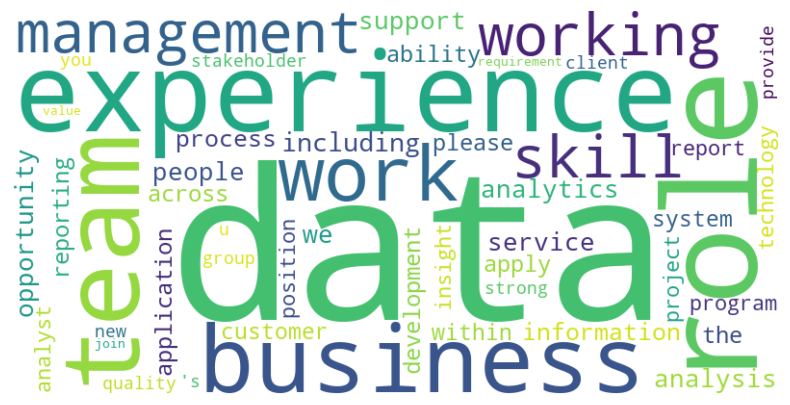

In [ ]:
def nuage_de_mots(dico_compte,sauvegarde):
    # Créez un objet WordCloud
    nuage_de_mots = WordCloud(width=800, height=400, background_color='white',max_words=50)

    # Générez le nuage de mots à partir du dictionnaire
    nuage_de_mots.generate_from_frequencies(resultat)

    # Affichez le nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(nuage_de_mots, interpolation='bilinear')
    plt.axis('off')

    # Sauvegardez l'image
    plt.savefig(f"{sauvegarde}.jpeg")

    plt.show()

nuage_de_mots(resultat,"nuage_de_mots_description_lem")

Similarité de documents

In [ ]:
st = stopwords.words('english')

vectorizer = TfidfVectorizer(lowercase=True, stop_words=st,
                            ngram_range=(1, 1),
                            use_idf=True, smooth_idf=True, 
                            sublinear_tf=False, norm='l2')

In [ ]:
dtm = vectorizer.fit_transform(df.description_lem)

Nom des colonnes

In [ ]:
vectorizer.get_feature_names_out()

array(['00', '000', '0001', ..., 'zero', 'zetland', 'zoo'], dtype=object)

In [ ]:
sim_matrix = cosine_similarity(dtm, dtm)

In [ ]:
query = ["Data Scientist Excel SQL Python junior"]

In [ ]:
query_vector = vectorizer.transform(query)
query_corpus_sim = cosine_similarity(query_vector, dtm)

In [ ]:
idx_most_sim = np.argmax(query_corpus_sim)
df.loc[idx_most_sim]

titre                                               Lead Data Scientist
entreprise                                           Intelligen Pty Ltd
lieu                                                         Sydney NSW
categorie             Mathematics, Statistics & Information Sciences...
contrat                                                       Full time
salaire                                  Up to $170k + Super + 16% STIP
parution                                                  Posted 2d ago
description           Incredible team of driven, passionate and inno...
note                                                                NaN
review                                                              NaN
parution_modif                                                       2d
description_stem      incred team driven passion innov data scientis...
description_lem       incredible team driven passionate innovative d...
description_compte    {'incredible': 1, 'team': 3, 'driven': 1, 

Sauvegarde du nouveau jeu de données traité

In [ ]:
# Sauvegarde du nouveau jeu de données modifiés
date = datetime.today().strftime('%Y%m%d')
df.to_excel(f"{date}-Donnees_Info_Poste_Modif.xlsx", index=False)